In [1]:
female_path = "C:/Users/sarfr/Desktop/imagep/Training/female"
male_path = "C:/Users/sarfr/Desktop/imagep/Training/male"

In [2]:

import tensorflow as tf
import numpy as np
import os

from keras.optimizer_v1 import RMSprop
from keras_preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def getNumPics():
    print("The Number Of Female Pictures =",len(os.listdir(female_path)))
    print("The Number Of Male Pictures =",len(os.listdir(male_path)))

def getNamePic(index,gender):
    if gender == 'm' or gender == 'M':
        female_name = os.listdir(female_path)
        print(female_name[index])
    elif gender == 'f' or gender == 'F':
        male_name = os.listdir(male_path)
        print(male_name[index])
    else:
        print("Invalid Input")

def drawPics(index):#draw some pictures(male and female) in the directory from index

    rows = 4
    cols = 4
    fig = plt.gcf()
    fig.set_size_inches(cols * 4, rows * 4)

    index += 8
    female_name = os.listdir(female_path)
    male_name = os.listdir(male_path)
    next_male_pic = [os.path.join(male_path, fname)
                for fname in male_name[index-8:index]]
    next_female_pic = [os.path.join(female_path, fname)
                for fname in female_name[index-8:index]]

    for i, img_path in enumerate(next_male_pic+next_female_pic):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(rows, cols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)

        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()

def drawSoloPic(path):
    rows = 4
    cols = 4
    fig = plt.gcf()
    fig.set_size_inches(cols * 4, rows * 4)
    sp = plt.subplot(cols, rows, 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(path)
    plt.imshow(img)

    plt.show()

In [3]:
import os
male_path = os.path.join('./Train/Male')
female_path = os.path.join('./Train/Female')

In [4]:
#getNumPics()
#getNamePic(5,'f')
#drawPics(0)

In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        1

In [6]:
from tensorflow import *
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [7]:
from tensorflow import *
datagen = ImageDataGenerator(rescale=1/255)

train_generator = datagen.flow_from_directory(
        'C:/Users/sarfr/Desktop/imagep/Training',  # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 128 x 128
        batch_size=256,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 47009 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=70,
      epochs=10)

Epoch 1/10
70/70 [==============================] - 310s 4s/step - loss: 0.6471 - accuracy: 0.6036
Epoch 2/10
70/70 [==============================] - 316s 5s/step - loss: 0.3922 - accuracy: 0.8277
Epoch 3/10
70/70 [==============================] - 390s 6s/step - loss: 0.2769 - accuracy: 0.8914
Epoch 4/10
70/70 [==============================] - 374s 5s/step - loss: 0.2296 - accuracy: 0.9084
Epoch 5/10
70/70 [==============================] - 374s 5s/step - loss: 0.1962 - accuracy: 0.9263
Epoch 6/10
70/70 [==============================] - 344s 5s/step - loss: 0.1734 - accuracy: 0.9353
Epoch 7/10
70/70 [==============================] - 309s 4s/step - loss: 0.1683 - accuracy: 0.9377
Epoch 8/10
70/70 [==============================] - 349s 5s/step - loss: 0.1566 - accuracy: 0.9434
Epoch 9/10
70/70 [==============================] - 302s 4s/step - loss: 0.1513 - accuracy: 0.9443
Epoch 10/10
70/70 [==============================] - 247s 4s/step - loss: 0.1397 - accuracy: 0.9474


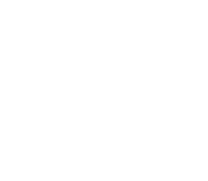

Male---------- array([77.12284], dtype=float32)


In [13]:
import numpy as np
from keras.preprocessing import image

# predicting images
#path = filedialog.askopenfilename()
path = 'Capture.PNG'
img = image.load_img(path, target_size=(128, 128))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
drawSoloPic(path)
if classes[0]>0.5:
    print("Male----------",classes[0]*100)
else:
    print("Female----------",100-classes[0]*100)

